In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd

# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 분류 SVM
from sklearn.svm import SVC

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가
from sklearn.metrics import confusion_matrix

In [2]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
df_raw = pd.read_csv("./HMEQ.csv", encoding='euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
# fillna: 결측치 대체 함수
# JOB 변수의 결측치는 "Other"로 대체, inplace:fillna 함수 적용 후 df_raw 데이터에 저장, False면 저장 안함
df_raw["JOB"].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace = True)

In [5]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [6]:
# get_dummies: 데이터의 문자형 변수에 대한 더미 변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
# 목표 변수, 설명변수 데이터 지정
df_raw_y = df_raw_dummy["BAD"]
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)

In [8]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y .shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


### step 2 모델 생성

In [9]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 셋 정확도
print("Score on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Score on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score on training set: 1.000
Score on test set: 0.908


In [10]:
svm_uncustomized

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1234,
    shrinking=True, tol=0.001, verbose=False)

### SVM 모델 Parameter 변경
- C: 규제에 대한 강도 변경

In [11]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []
# c: 규제(0.01, 0.1, 1, 10)
para_c= [10 ** c for c in range(-2,2)] #참조: para_C: [0.01,0.1,1,10,100]

for v_C in para_c:
    svm = SVC(C= v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainScore"] = train_accuracy
df_accuracy_c["TestScore"] = test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

In [12]:
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainScore,TestScore
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,1.000,0.908
3,10.00,1.000,0.908


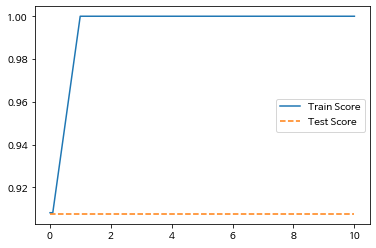

In [13]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

### Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [32]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []
# gamma: 규제(0.01, 0.1, 1, 10)
para_gamma= [10 ** gamma for gamma in range(-2,2)] #참조: para_gamma: [0.01,0.1,1,10,100]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C= 0.1, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 데이터 테이블 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["gamma"] = para_gamma
df_accuracy_c["TrainScore"] = train_accuracy
df_accuracy_c["TestScore"] = test_accuracy

In [33]:
# Gamma별 정확도 테이블
df_accuracy_c.round(3)

,gamma,TrainScore,TestScore
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.908,0.908
3,10.00,0.908,0.908


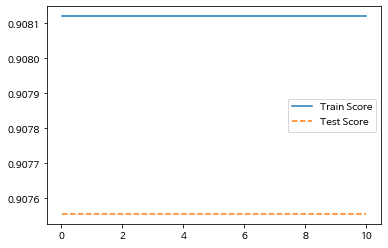

In [34]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

In [17]:
# 변수명 저장
v_feature_name = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [18]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (2623, 18)
test data X size : (1125, 18)


### scale 조절 후 SVM 모델 재실행
- scale이 조정된 데이터로 새로운 모델 생성

In [19]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy: {0:.3f}\n".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Acurracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy: 0.944

Acurracy on test set: 0.935


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 새로운 SVM 모델 Parameter 변경
- C: 규제에 대한 강도 변경

In [20]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []
# c: 규제(0.01, 0.1, 1, 10)
para_c= [10 ** c for c in range(-2,2)] 

for v_C in para_c:
    svm = SVC(C= v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainScore"] = train_accuracy
df_accuracy_c["TestScore"] = test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

In [21]:
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainScore,TestScore
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.944,0.935
3,10.00,0.979,0.949


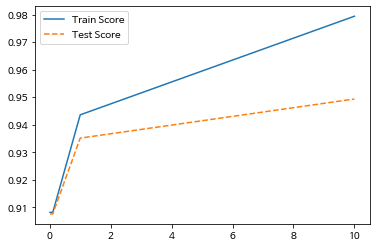

In [22]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# gamma: 규제(0.01, 0.1, 1, 10)
para_gamma= [10 ** gamma for gamma in range(-2,2)] #참조: para_gamma: [0.01,0.1,1,10,100]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C= 1, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["gamma"] = para_gamma
df_accuracy_c["TrainScore"] = train_accuracy
df_accuracy_c["TestScore"] = test_accuracy

In [24]:
# Gamma별 정확도 테이블
df_accuracy_c.round(3)

,gamma,TrainScore,TestScore
0,0.01,0.923,0.920
1,0.10,0.960,0.942
2,1.00,0.996,0.920
3,10.00,1.000,0.908


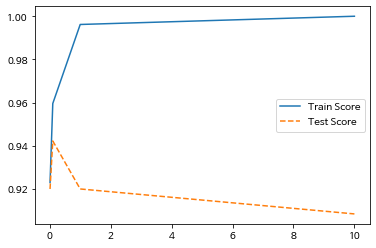

In [25]:
# Gamma별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

In [26]:
# 임의로 지정
gamma = 0.1

### step 3 결론 도출
- 최종 모델 선택

In [27]:
# 최종 모델
svm_final = SVC(gamma = 0.1, C= 1, random_state = 1234)
svm_final.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred = svm_final.predict(df_scaled_test_x)


# train 데이터 셋 정확도
print("Accuracy: {0:.3f}\n".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Acurracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confustion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))


Accuracy: 0.944

Acurracy on test set: 0.935
Confustion matrix: 
[[1021    0]
 [  65   39]]


### 서포트 벡터 머신 Parameter 조정 - 추가
- GridSearchCV를 이용한 최적 parameter 찾기

In [28]:
estimator = SVC(random_state = 1234)
# 구하고자 하는 parameter와 범위
param_grid = {"C": para_c,
             "gamma": para_gamma}

# 정확도가 높은 최적 parameter 찾기
grid_svm = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_svm.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_svm.best_estimator_))
print("\nbest parameter: \n{}".format(grid_svm.best_params_))
print("\nbest score: \n{}".format(grid_svm.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

best parameter: 
{'C': 10, 'gamma': 0.1}

best score: 
0.95
